Q1 Generating 1000 Random Numbers

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = (np.random.rand(1000)*100)
x= np.asarray(x,dtype='int')
y = x+np.random.normal(0,50,1000)
y= np.asarray(y,dtype='int')

In [3]:
x,y

(array([18, 30, 16, 14, 17, 52, 49, 58, 82, 30, 86, 19, 12, 59, 22, 57, 80,
        50,  3, 17, 60, 13, 62, 12, 33, 64, 34, 98, 92, 64, 74, 43, 86,  7,
        26, 18, 76, 84, 48, 58, 84, 20,  4,  8, 74, 44, 15, 20, 39, 78, 48,
        82, 35, 89, 11, 69, 60, 73, 51, 31, 57, 24, 92, 25, 77, 37, 92, 71,
        31, 56, 80, 62,  9, 70, 95, 74,  6, 73, 50, 86, 91, 95, 48, 46,  9,
        34, 26,  2, 83, 81, 36, 33, 42, 81, 83,  3, 99, 40, 65, 51, 16, 92,
        40, 90, 36, 44, 42,  0, 25, 23, 79,  2, 94, 23, 28, 77, 30,  2, 35,
        81, 93, 16, 84, 96, 36, 37, 10, 36, 27, 25, 17, 83, 54, 49, 58, 20,
        89, 23, 78, 99, 56, 51, 79, 39, 57, 23, 20, 23, 84, 84, 52, 57, 10,
        61, 87, 65, 43, 57, 58, 21, 31, 30,  4, 42, 40, 27, 68, 79, 70, 71,
        70, 43, 66, 10, 64, 22, 48, 13, 44, 58, 81, 51, 68, 12, 50, 65, 16,
        79, 81,  2,  7, 45, 90, 63, 59, 35, 22, 62, 14, 15, 12, 82,  5, 47,
        29, 63, 89, 32, 97, 20, 93, 20, 73, 95, 33, 81, 93,  8, 93, 49, 57,
        24, 

Q2 Linear Regression from scratch

In [4]:
inds = np.random.permutation(len(x))
size = round(len(x)*0.7)
train,test = inds[:size],inds[size:]

In [5]:
x_train,x_test,y_train,y_test = x[train],x[test],y[train],y[test]

In [6]:
m_scr = ((x_train-x_train.mean())*(y_train-y_train.mean())).sum()/((x_train-x_train.mean())**2).sum()
c_scr = y_train.mean()-(x_train.mean()*m_scr)
m_scr,c_scr

(0.9046937554410581, 7.133627294621164)

In [7]:
y_pred_scr = c_scr + (m_scr*x_test)

In [8]:
def accuracy(y_pred,y_test):
    print("mae :",np.abs(y_test-y_pred).mean())
    print("rmse :",(((y_test-y_pred)**2).mean())**0.5)

In [9]:
accuracy(y_pred_scr,y_test)

mae : 38.22299568250259
rmse : 48.50556333129291


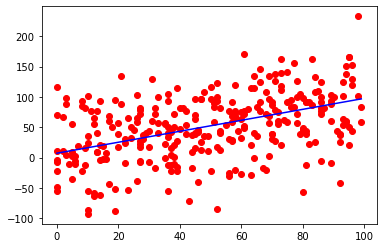

In [10]:
import matplotlib.pyplot as plt
plt.plot(x_test,y_pred_scr,c="b")
plt.scatter(x_test,y_test,c="r")

Q3 Gradient Descent

In [11]:
m_gd,c_gd = 0,0

In [12]:
l = 0.0001
epochs = 30000
n = float(len(x_train))

In [13]:
for i in range(epochs): 
    y_p= m_gd*x_train + c_gd
    D_m = (-2/n) * sum(x_train * (y_train - y_p))
    D_c = (-2/n) * sum(y_train - y_p)
    m_gd = m_gd - l * D_m
    c_gd = c_gd - l * D_c

In [14]:
m_gd,c_gd

(0.9257668201699256, 5.714744185087895)

In [15]:
y_pred_gd = m_gd*x_test + c_gd

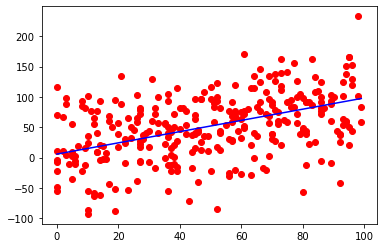

In [16]:
plt.plot(x_test,y_pred_gd,c="b")
plt.scatter(x_test,y_test,c="r")

In [17]:
accuracy(y_pred_gd,y_test)

mae : 38.22514268979527
rmse : 48.52788709361656


Q4 SKLearn Module

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

In [19]:
c_skl = reg.intercept_[0]
m_skl = reg.coef_[0,0]

In [20]:
y_pred_skl = reg.predict(x_test.reshape(-1,1))

In [21]:
accuracy(y_pred_skl,y_test)

mae : 47.4788414649149
rmse : 59.512910516401796


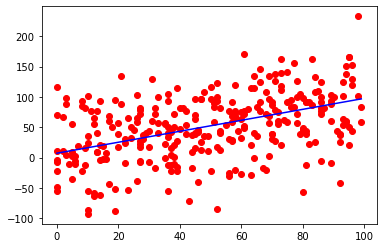

In [22]:
plt.scatter(x_test,y_test,c="r")
plt.plot(x_test,y_pred_skl,c="b")

In [23]:
print("Linear Reg from Scratch :")
print("\tSlope",m_scr,"\tIntercept:",c_scr)
print("Gradient Descent Method :")
print("\tSlope",m_gd,"\tIntercept:",c_gd)
print("SKLearn Method :")
print("\tSlope",m_skl,"\tIntercept:",c_skl)

Linear Reg from Scratch :
	Slope 0.9046937554410581 	Intercept: 7.133627294621164
Gradient Descent Method :
	Slope 0.9257668201699256 	Intercept: 5.714744185087895
SKLearn Method :
	Slope 0.9046937554410588 	Intercept: 7.133627294621135
